# Parte I

**Campos finitos**
- Definición de campo finito  
- Campo finito $ GF(p) $  
- El campo finito $ GF(2^m) $

**Curvas elípticas**
- Curvas elípticas sobre $GF(p)$  
- Curvas elípticas sobre $ GF(2^m)$  
- Aritmética de puntos en curvas elípticas  
- Logaritmo discreto sobre curvas elípticas  


Un **campo finito** consiste en un conjunto finito de elementos $ F $ sobre el cual se definen un par de operaciones binarias $ + $ y $ \cdot $, las cuales satisfacen las siguientes propiedades aritméticas:

1. $(F, +)$ es un grupo abeliano, denominado el **grupo aditivo** del campo.
2. $(F^* = F - 0, \cdot)$ es un grupo abeliano, al que se denomina **grupo multiplicativo** del campo.
3. El producto tiene la propiedad **distributiva** respecto de la suma, esto es,
   $
   a \cdot (b + c) = a \cdot b + a \cdot c.
   $


El **orden** de un campo finito es el número de elementos en el campo. Existe un campo finito de orden $ q $ si y solo si $ q $ es la potencia de un número primo. Si $ q $ es la potencia de un primo, existe esencialmente un solo campo finito de orden $ q $ al cual denotaremos como $ GF(q) $.


### El campo finito $ GF(p) $

Sea $ p $ un número primo. El campo $ GF(p) $, denominado un **campo primo**, está compuesto por el conjunto de enteros $ \{ 0, 1, \dots, p-1 \} $ con las siguientes operaciones aritméticas:

- **Adición**: Si $ a, b \in GF(p) $, entonces $ a + b = r $, donde $ r $ es el residuo de la división de $ a + b $ entre $ p $, $ 0 \leq r \leq p - 1 $. Esta operación es conocida como la **suma módulo $ p $**.

- **Multiplicación**: Si $ a, b \in GF(p) $, entonces $ a \cdot b = s $, donde $ s $ es el residuo de la división de $ a \cdot b $ entre $ p $. A esta operación se le conoce como **multiplicación módulo $ p $**.

- **Inversión**: Si $ a \in GF(p) $ diferente de cero, el **inverso** de $ a $ módulo $ p $, denotado como $ a^{-1} $, es el entero único $ c \in GF(p) $ tal que $ a \cdot c = 1 $.


### Ejemplo 1:
 El campo finito $ GF(23) $. Los elementos de $ GF(23) $ son
$$
\{ 0, 1, 2, \dots, 22 \}
$$

Ejemplos de operaciones aritméticas sobre $ GF(23) $ son:

-  $ 12 + 20 = 9 $
- $ 8 \cdot 9 = 3 $
- $ 8^{-1} = 3 $

El elemento 5 es un generador de $ GF(23) $. Las potencias de 5 son:

$$
5^0 = 1 \quad 5^1 = 5 \quad 5^2 = 25 \quad 5^3 = 10 \quad 5^4 = 4 \quad 5^5 = 20
$$
$$
5^6 = 8 \quad 5^7 = 17 \quad 5^8 = 16 \quad 5^9 = 5 \quad 5^{11} = 22
$$
$$
5^{12} = 18 \quad 5^{13} = 21 \quad 5^{14} = 13 \quad 5^{15} = 19 \quad 5^{16} = 3
$$
$$
5^{17} = 15 \quad 5^{19} = 7 \quad 5^{20} = 12 \quad 5^{21} = 14 \quad 5^{22} = 1
$$


### El campo finito $ GF(2^m) $

El campo $ GF(2^m) $, denominado un campo finito de característica dos o campo finito binario, puede ser visto como un espacio vectorial de dimensión $ m $ sobre el campo $ GF(2) $. Esto es, existen $ m $ elementos $ \alpha_0, \alpha_1, \dots, \alpha_{m-1} $ en $ GF(2^m) $ tales que cada elemento $ \alpha \in GF(2^m) $ puede ser escrito en forma única como:

$$
\alpha = a_0 \alpha_0 + a_1 \alpha_1 + \cdots + a_{m-1} \alpha_{m-1},
$$

donde $ a_i \in \{ 0, 1 \} $.


Al conjunto $ \{ \alpha_0, \alpha_1, \dots, \alpha_{m-1} \} $ se le denomina una **base** de $ GF(2^m) $ sobre $ GF(2) $. Dada una base tal, un elemento $ \alpha $ del campo puede ser representado por la cadena de bits $ (a_0 a_1 \dots a_{m-1}) $. La adición de elementos en el campo se realiza mediante el **XOR** bit a bit de sus representaciones vectoriales.


### Curvas elípticas sobre $ GF(p) $

Sea $ GF(p) $ un campo finito de característica $ p \neq 2, 3 $, y sean $ a, b \in GF(p) $ tales que satisfacen la desigualdad $ 4a^3 + 27b^2 \neq 0 $. Una **curva elíptica** $ E_{a,b} $ sobre $ GF(p) $ se define como el conjunto de puntos $ (x, y) \in GF(p) \times GF(p) $ que satisfacen la ecuación

$$
y^2 = x^3 + ax + b
$$

junto con un punto especial $ \mathcal{O} $, denominado el **punto al infinito**. Estos puntos forman un grupo abeliano bajo la operación aditiva que describiremos a continuación.


![Curva Elíptica](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/ECClines-3.svg/335px-ECClines-3.svg.png)


### Aritmética de puntos en curvas elípticas sobre GF(p)

Sea $ E(a,b) $ una curva elíptica sobre $ GF(p) $ y sean $ P $ y $ Q $ dos puntos sobre $ E(a,b) $ . Se tiene que $ P + O = O + P = P $ . Sean $ P = (x_1, y_1) $ y $ Q = (x_2, y_2) $ . Entonces $ -P = (x_1, -y_1) $ y $ P + (-P) = O $ . Si $ Q \neq -P $ , entonces $ P + Q = (x_3, y_3) $ donde:

$$
x_3 = \lambda^2 - x_1 - x_2
$$
$$
y_3 = \lambda(x_1 - x_3) - y_1
$$

y

$$
\lambda =
\begin{cases}
\frac{y_2 - y_1}{x_2 - x_1} & \text{si } P \neq Q \\
\frac{3x_1^2 + a}{2y_1} & \text{si } P = Q
\end{cases}
$$


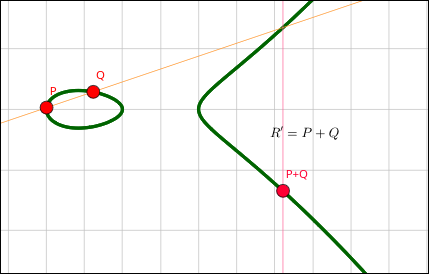

![2](https://universo.math.org.mx/2014-3/olimpiada/suminf.jpg)

In [ ]:
def add_points(P, Q, p, a, b):
    # Desempaquetamos las coordenadas de P y Q
    x1, y1 = P
    x2, y2 = Q

    # Verificamos si P y Q son iguales (caso de duplicación del punto)
    if x1 == x2 and y1 == y2:
        # Fórmula de la derivada para calcular la pendiente (beta) cuando los puntos son iguales
        beta = (3 * x1**2 + a) * pow(2 * y1, -1, p) % p
    else:
        # Fórmula de la pendiente cuando los puntos son diferentes
        beta = (y2 - y1) * pow(x2 - x1, -1, p) % p

    # Calculamos las nuevas coordenadas del punto resultante (x3, y3)
    x3 = (beta**2 - x1 - x2) % p
    y3 = (beta * (x1 - x3) - y1) % p

    return x3, y3

def is_on_curve(P, mod, a, b):
    # Verificamos si el punto P está sobre la curva elíptica
    x, y = P1
    assert (y**2 % mod == (x**3 + a*x + b) % mod), "El punto no está sobre la curva"
    return True


# Protocolo ECDH

A y B desean acordar una clave a través de un canal inseguro.

Siguen el siguiente protocolo:

1. Establecen los parámetros de dominio. Esto es $(\rho, a, b, G, n, h)$ en el caso primo o $(m, f(x), a, b, G, n, h)$ en el caso binario.
2. A selecciona al azar un entero $k_A$ en el intervalo $[1, n-1]$. Calcula $Q_A = k_A G$.
3. B selecciona al azar un entero $k_B$ en el intervalo $[1, n-1]$. Calcula $Q_B = k_B G$.
4. A y B intercambian $Q_A$ y $Q_B$.
5. A calcula $k_A Q_B$.
6. B calcula $k_B Q_A$.
7. Ambas partes comparten el punto $k_A Q_B = k_A k_B G = k_B k_A G = k_B Q_A$.


![!DHEC](https://i0.wp.com/sefiks.com/wp-content/uploads/2016/04/ecdh.png?resize=334%2C257&ssl=1)

###**Curva** **secp256k1**

In [ ]:

# y^2 = x^3 + a*x + b = y^2 = x^3 + 7
a = 0; b = 7

#base point
G = (55066263022277343669578718895168534326250603453777594175500187360389116729240,
     32670510020758816978083085130507043184471273380659243275938904335757337482424)

P1 = (3441641438892359589923750308532785224089551896647546423970081695051607104119,
 4069236990256117999617708243952512478982953190562608787139299693752)
P2= (89565891926547004231252920425935692360644145829622209833684329913297188986597,12158399299693830322967808612713398636155367887041628176798871954788371653930)
#finite field
mod = pow(2, 256) - pow(2, 32) - pow(2, 9) - pow(2, 8) - pow(2, 7) - pow(2, 6) - pow(2, 4) - pow(2, 0)
order = 115792089237316195423570985008687907852837564279074904382605163141518161494337

In [ ]:
is_on_curve(G,mod,a,b)

True

In [ ]:
tmp_point = G
for i in range(2,11):
    tmp_point = add_points(tmp_point,G,mod,0,7)
    print(f"{i}G = {tmp_point}")

2G = (89565891926547004231252920425935692360644145829622209833684329913297188986597, 12158399299693830322967808612713398636155367887041628176798871954788371653930)
3G = (112711660439710606056748659173929673102114977341539408544630613555209775888121, 25583027980570883691656905877401976406448868254816295069919888960541586679410)
4G = (103388573995635080359749164254216598308788835304023601477803095234286494993683, 37057141145242123013015316630864329550140216928701153669873286428255828810018)
5G = (21505829891763648114329055987619236494102133314575206970830385799158076338148, 98003708678762621233683240503080860129026887322874138805529884920309963580118)
6G = (115780575977492633039504758427830329241728645270042306223540962614150928364886, 78735063515800386211891312544505775871260717697865196436804966483607426560663)
7G = (41948375291644419605210209193538855353224492619856392092318293986323063962044, 48361766907851246668144012348516735800090617714386977531302791340517493990618)
8G = (2126205

In [2]:
!pip install tinyec

  Preparing metadata (setup.py) ... done
  Created wheel for tinyec: filename=tinyec-0.4.0-py3-none-any.whl size=20877 sha256=571e4bbb016d88d2818e6a6d56beece24966cbaf6676775561970e10ae6eb174
  Stored in directory: /root/.cache/pip/wheels/db/86/a7/922d884ea8657b29b0231d6566159462328473186637fcc02e
Successfully built tinyec


La curva elíptica utilizada para los cálculos de ECDH es una curva de 256 bits llamada `brainpoolP256r1`. Las claves privadas son de 256 bits (64 dígitos hexadecimales) y se generan aleatoriamente. Las claves públicas tendrán 257 bits (65 dígitos hexadecimales), debido a la compresión de la clave.

In [3]:
# Importación de las librerías necesarias.
# `registry` es para obtener la curva elíptica y `secrets` se usa para generar claves aleatorias seguras.
from tinyec import registry
import secrets

# Función para comprimir una clave pública en formato hexadecimal
# Este es un método para representar la clave pública de forma compacta, concatenando la coordenada x y el bit de la coordenada y.
def compress(pubKey):
    # Devuelve la coordenada x de la clave pública como un número hexadecimal y luego el bit menos significativo de y
    return hex(pubKey.x) + hex(pubKey.y % 2)[2:]

# Se obtiene la curva elíptica "brainpoolP256r1" de la biblioteca `tinyec`
# Esta curva se usará para la generación de claves y operaciones criptográficas.
curve = registry.get_curve('brainpoolP256r1')

# Alice genera su clave privada de forma aleatoria, un número entre 1 y el orden de la curva.
# El campo `.n` es el orden del grupo, que es la cantidad de elementos en el grupo de puntos de la curva.
alicePrivKey = secrets.randbelow(curve.field.n)

# La clave pública de Alice se calcula multiplicando su clave privada por el generador `curve.g`
# `curve.g` es un punto base en la curva elíptica.
alicePubKey = alicePrivKey * curve.g

# Se imprime la clave pública comprimida de Alice (en formato hexadecimal).
print("Alice public key:", compress(alicePubKey))

# Bob hace lo mismo que Alice: genera su propia clave privada aleatoria.
bobPrivKey = secrets.randbelow(curve.field.n)

# La clave pública de Bob se calcula de la misma manera multiplicando su clave privada por el generador `curve.g`.
bobPubKey = bobPrivKey * curve.g

# Se imprime la clave pública comprimida de Bob.
print("Bob public key:", compress(bobPubKey))

# Simulamos un intercambio de claves, por ejemplo, a través de Internet.
print("Now exchange the public keys (e.g. through Internet)")

# Alice calcula la clave compartida usando su clave privada y la clave pública de Bob.
# Esto se hace multiplicando la clave privada de Alice por la clave pública de Bob.
# La clave compartida de Alice será el mismo valor que la clave de Bob, pero calculada desde el lado de Alice.
aliceSharedKey = alicePrivKey * bobPubKey

# Se imprime la clave compartida de Alice (comprimida).
print("Alice shared key:", compress(aliceSharedKey))

# Bob hace lo mismo: calcula la clave compartida usando su clave privada y la clave pública de Alice.
bobSharedKey = bobPrivKey * alicePubKey

# Se imprime la clave compartida de Bob (comprimida).
print("Bob shared key:", compress(bobSharedKey))

# Finalmente, verificamos si las claves compartidas de Alice y Bob son iguales.
# De acuerdo con el protocolo ECDH, ambos deberían calcular la misma clave compartida, ya que:
#   AliceSharedKey == BobSharedKey
print("Equal shared keys:", aliceSharedKey == bobSharedKey)


Alice public key: 0xa1231537190546d7ddcc7615afcb512fd788755cb241db6b957f67c3ad8fa84d0
Bob public key: 0x42edb2803368e6890fa1423716dfe400a7bd3533dabac31c3634880112c8188a1
Now exchange the public keys (e.g. through Internet)
Alice shared key: 0x220286d2515fc521ca963e24962bd2308cb8c1254514886933dfe0ab26c062400
Bob shared key: 0x220286d2515fc521ca963e24962bd2308cb8c1254514886933dfe0ab26c062400
Equal shared keys: True


Debido a la aleatorización, si ejecutas el código anterior, las claves serán diferentes, pero el secreto compartido calculado para Alice y Bob al final siempre será el mismo. El secreto compartido generado es un entero de 257 bits (punto EC comprimido para una curva de 256 bits, codificado como 65 dígitos hexadecimales).
